<a href="https://colab.research.google.com/github/Alexiserges/-Covid19NewCasesPrediction/blob/main/Covid19_Prediction_with_Boruta_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
###Let import all the library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime


In [7]:
df = pd.read_csv('Public-covid19.csv')

In [8]:
df.head()

COUNTY        DATE  TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  \
0  Anderson  10/12/2022        26624          2            16211   
1   Bedford  10/12/2022        17298          5            12508   
2    Benton  10/12/2022         5424          0             3154   
3   Bledsoe  10/12/2022         5220          0             3827   
4    Blount  10/12/2022        46919          5            37075   

   NEW_CONFIRMED  TOTAL_PROBABLE  NEW_PROBABLE  POS_TESTS  NEW_POS_TESTS  \
0              1           10413             1      17646              1   
1              5            4790             0      13873              5   
2              0            2270             0       3367              0   
3              0            1393             0       4061              0   
4              3            9844             2      39618              3   

   NEG_TESTS  NEW_NEG_TESTS  TOTAL_TESTS  NEW_TESTS  NEW_DEATHS  TOTAL_DEATHS  \
0      94584              7       112230          8           0           381   
1      53100             11        66973         16           0           246   
2      15084              6        18451          6           0           101   
3      24075              1        28136          1           0            63   
4     138816             25       178434         28           0           502   

   NEW_HOSPITALIZED  TOTAL_HOSPITALIZED  TOTAL_DEATHS_BY_DOD  \
0                 0                 385                  381   
1                 0                 335                  246   
2                 0                 129                  101   
3                 0                 100                   63   
4                 0                 963                  501   

   NEW_DEATHS_BY_DOD  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97388 entries, 0 to 97387
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COUNTY               97388 non-null  object
 1   DATE                 97388 non-null  object
 2   TOTAL_CASES          97388 non-null  int64 
 3   NEW_CASES            97388 non-null  int64 
 4   TOTAL_CONFIRMED      97388 non-null  int64 
 5   NEW_CONFIRMED        97388 non-null  int64 
 6   TOTAL_PROBABLE       97388 non-null  int64 
 7   NEW_PROBABLE         97388 non-null  int64 
 8   POS_TESTS            97388 non-null  int64 
 9   NEW_POS_TESTS        97388 non-null  int64 
 10  NEG_TESTS            97388 non-null  int64 
 11  NEW_NEG_TESTS        97388 non-null  int64 
 12  TOTAL_TESTS          97388 non-null  int64 
 13  NEW_TESTS            97388 non-null  int64 
 14  NEW_DEATHS           97388 non-null  int64 
 15  TOTAL_DEATHS         97388 non-null  int64 
 16  NEW_

In [10]:
df.describe()

TOTAL_CASES     NEW_CASES  TOTAL_CONFIRMED  NEW_CONFIRMED  \
count   97388.000000  97388.000000     97388.000000   97388.000000   
mean    11611.231425     24.732318      9032.991395      18.165472   
std     25663.546307     79.750830     21949.559573      66.930731   
min         0.000000      0.000000         0.000000       0.000000   
25%      1372.000000      1.000000      1118.000000       1.000000   
50%      4296.000000      6.000000      3070.000000       3.000000   
75%     10686.000000     19.000000      7117.250000      13.000000   
max    281618.000000   3352.000000    245966.000000    3077.000000   

       TOTAL_PROBABLE  NEW_PROBABLE      POS_TESTS  NEW_POS_TESTS  \
count    97388.000000  97388.000000   97388.000000   97388.000000   
mean      2578.240030      6.566846   10212.045457      20.236692   
std       4383.520538     18.104510   25573.928901      75.122314   
min          0.000000      0.000000       0.000000       0.000000   
25%        141.000000      0.000000    1281.750000       1.000000   
50%       1044.000000      1.000000    3451.500000       4.000000   
75%       3030.000000      6.000000    7936.000000      14.000000   
max      38711.000000   1136.000000  292144.000000    3593.000000   

          NEG_TESTS  NEW_NEG_TESTS   TOTAL_TESTS     NEW_TESTS    NEW_DEATHS  \
count  9.738800e+04   97388.000000  9.738800e+04  97388.000000  97388.000000   
mean   7.400470e+04     125.384934  8.421675e+04    145.621627      0.292038   
std    2.104182e+05     437.076523  2.323943e+05    483.959683      1.541587   
min    0.000000e+00       0.000000  0.000000e+00      0.000000    -36.000000   
25%    8.566750e+03       8.000000  9.894000e+03     10.000000      0.000000   
50%    1.999850e+04      24.000000  2.369050e+04     29.000000      0.000000   
75%    4.515425e+04      76.000000  5.379575e+04     92.000000      0.000000   
max    1.884455e+06   13887.000000  2.176599e+06  14079.000000    207.000000   

       TOTAL_DEATHS  NEW_HOSPITALIZED  TOTAL_HOSPITALIZED  \
count  97388.000000      97388.000000        97388.000000   
mean     147.685577          0.534357          320.606019   
std      294.821384          1.760175          771.778335   
min        0.000000          0.000000            0.000000   
25%       22.000000          0.000000           51.000000   
50%       69.000000          0.000000          122.000000   
75%      162.000000          0.000000          267.000000   
max     3567.000000         53.000000         9039.000000   

       TOTAL_DEATHS_BY_DOD  NEW_DEATHS_BY_DOD  
count         97388.000000       97388.000000  
mean            156.421356           0.292182  
std             306.837655           0.875053  
min               0.000000           0.000000  
25%              25.000000           0.000000  
50%              75.000000           0.000000  
75%             172.000000           0.000000  
max            3566.000000          23.000000

In [11]:
df.isnull().sum()

COUNTY                 0
DATE                   0
TOTAL_CASES            0
NEW_CASES              0
TOTAL_CONFIRMED        0
NEW_CONFIRMED          0
TOTAL_PROBABLE         0
NEW_PROBABLE           0
POS_TESTS              0
NEW_POS_TESTS          0
NEG_TESTS              0
NEW_NEG_TESTS          0
TOTAL_TESTS            0
NEW_TESTS              0
NEW_DEATHS             0
TOTAL_DEATHS           0
NEW_HOSPITALIZED       0
TOTAL_HOSPITALIZED     0
TOTAL_DEATHS_BY_DOD    0
NEW_DEATHS_BY_DOD      0
dtype: int64

In [12]:
df.tail()

COUNTY       DATE  TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  \
97383       Wayne  12/3/2020            0          0                0   
97384     Weakley  12/3/2020            0          0                0   
97385       White  12/3/2020            0          0                0   
97386  Williamson  12/3/2020            0          0                0   
97387      Wilson  12/3/2020            0          0                0   

       NEW_CONFIRMED  TOTAL_PROBABLE  NEW_PROBABLE  POS_TESTS  NEW_POS_TESTS  \
97383              0               0             0          0              0   
97384              0               0             0          0              0   
97385              0               0             0          0              0   
97386              0               0             0          2              2   
97387              0               0             0          0              0   

       NEG_TESTS  NEW_NEG_TESTS  TOTAL_TESTS  NEW_TESTS  NEW_DEATHS  \
97383          0              0            0          0           0   
97384          0              0            0          0           0   
97385          0              0            0          0           0   
97386          3              3            5          5           0   
97387          0              0            0          0           0   

       TOTAL_DEATHS  NEW_HOSPITALIZED  TOTAL_HOSPITALIZED  \
97383             0                 0                   0   
97384             0                 0                   0   
97385             0                 0                   0   
97386             0                 0                   0   
97387             0                 0                   0   

       TOTAL_DEATHS_BY_DOD  NEW_DEATHS_BY_DOD  
97383                    0                  0  
97384                    0                  0  
97385                    0                  0  
97386                    0                  0  
97387                    0                  0

In [13]:
df.shape

(97388, 20)

In [14]:
#Top 13 clusters with  cases_active per state
top_13_Newcase = df.sort_values(by='NEW_CASES', ascending=False).head(13)

fig = px.bar(top_13_Newcase .sort_values(by='NEW_CASES', ascending=True),
             x="NEW_CASES", y="COUNTY",
             title='CLusters Cases', text='NEW_CASES',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#3498db', textposition='outside')

Timeseries Visualisation

In [15]:
# create new dataframe by selecting cell/row started from 2020
df1 = df[df['DATE'].str.contains("2020")]

In [16]:
df1.head()

COUNTY        DATE  TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  \
68773  Anderson  31/12/2020         5818        163             4858   
68774   Bedford  31/12/2020         4679        107             3965   
68775    Benton  31/12/2020         1216         29             1053   
68776   Bledsoe  31/12/2020         1626         33             1547   
68777    Blount  31/12/2020        10895        217             9889   

       NEW_CONFIRMED  TOTAL_PROBABLE  NEW_PROBABLE  POS_TESTS  NEW_POS_TESTS  \
68773            100             960            63       5424            102   
68774             79             714            28       4585             89   
68775             17             163            12       1172             18   
68776             24              79             9       1642             25   
68777            200            1006            17      10953            217   

       NEG_TESTS  NEW_NEG_TESTS  TOTAL_TESTS  NEW_TESTS  NEW_DEATHS  \
68773      49726            304        55150        406           6   
68774      24750            219        29335        308           1   
68775       7558             37         8730         55           0   
68776      12372             38        14014         63           0   
68777      56861            334        67814        551           1   

       TOTAL_DEATHS  NEW_HOSPITALIZED  TOTAL_HOSPITALIZED  \
68773            72                 1                 158   
68774            61                 0                 150   
68775            30                 1                  46   
68776             9                 0                  37   
68777            98                 2                 350   

       TOTAL_DEATHS_BY_DOD  NEW_DEATHS_BY_DOD  
68773                   93                  5  
68774                   75                  4  
68775                   34                  0  
68776                   10                  0  
68777                  122                  3

In [17]:
df1 = df1.set_index('DATE')

In [18]:
df1[['NEW_CASES']]
             
 #df1_cases_new.tail(10)

NEW_CASES
DATE                 
31/12/2020        163
31/12/2020        107
31/12/2020         29
31/12/2020         33
31/12/2020        217
...               ...
12/3/2020           0
12/3/2020           0
12/3/2020           0
12/3/2020           0
12/3/2020           0

[28615 rows x 1 columns]

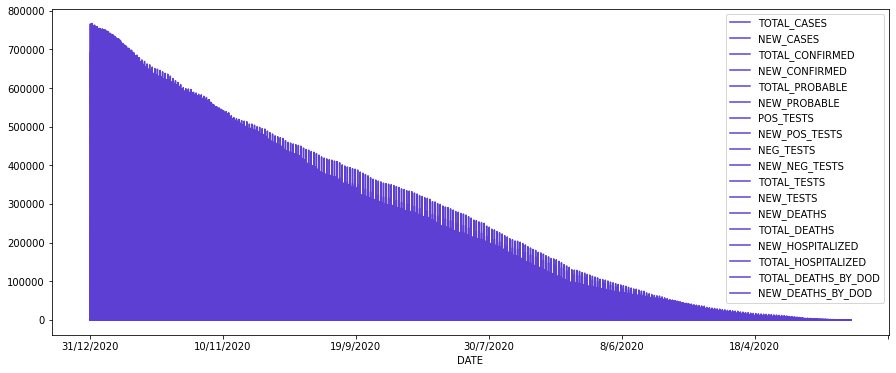

In [19]:
df1.plot(color='#5D3FD3', figsize=(15,6));

In [20]:
df1[['TOTAL_CASES','NEW_CASES','TOTAL_CONFIRMED',	'NEW_CONFIRMED','TOTAL_PROBABLE','NEW_PROBABLE',
     'NEW_DEATHS',	'TOTAL_DEATHS',	'NEW_HOSPITALIZED',	'TOTAL_HOSPITALIZED',	'TOTAL_DEATHS_BY_DOD','NEW_DEATHS_BY_DOD']]

TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  NEW_CONFIRMED  \
DATE                                                                 
31/12/2020         5818        163             4858            100   
31/12/2020         4679        107             3965             79   
31/12/2020         1216         29             1053             17   
31/12/2020         1626         33             1547             24   
31/12/2020        10895        217             9889            200   
...                 ...        ...              ...            ...   
12/3/2020             0          0                0              0   
12/3/2020             0          0                0              0   
12/3/2020             0          0                0              0   
12/3/2020             0          0                0              0   
12/3/2020             0          0                0              0   

            TOTAL_PROBABLE  NEW_PROBABLE  NEW_DEATHS  TOTAL_DEATHS  \
DATE                                                                 
31/12/2020             960            63           6            72   
31/12/2020             714            28           1            61   
31/12/2020             163            12           0            30   
31/12/2020              79             9           0             9   
31/12/2020            1006            17           1            98   
...                    ...           ...         ...           ...   
12/3/2020                0             0           0             0   
12/3/2020                0             0           0             0   
12/3/2020                0             0           0             0   
12/3/2020                0             0           0             0   
12/3/2020                0             0           0             0   

            NEW_HOSPITALIZED  TOTAL_HOSPITALIZED  TOTAL_DEATHS_BY_DOD  \
DATE                                                                    
31/12/2020                 1                 158                   93   
31/12/2020                 0                 150                   75   
31/12/2020                 1                  46                   34   
31/12/2020                 0                  37                   10   
31/12/2020                 2                 350                  122   
...                      ...                 ...                  ...   
12/3/2020                  0                   0                    0   
12/3/2020                  0                   0                    0   
12/3/2020                  0                   0                    0   
12/3/2020                  0                   0                    0   
12/3/2020                  0                   0                    0   

            NEW_DEATHS_BY_DOD  
DATE                           
31/12/2020                  5  
31/12/2020                  4  
31/12/2020                  0  
31/12/2020                  0  
31/12/2020                  3  
...                       ...  
12/3/2020                   0  
12/3/2020                   0  
12/3/2020                   0  
12/3/2020                   0  
12/3/2020                   0  

[28615 rows x 12 columns]

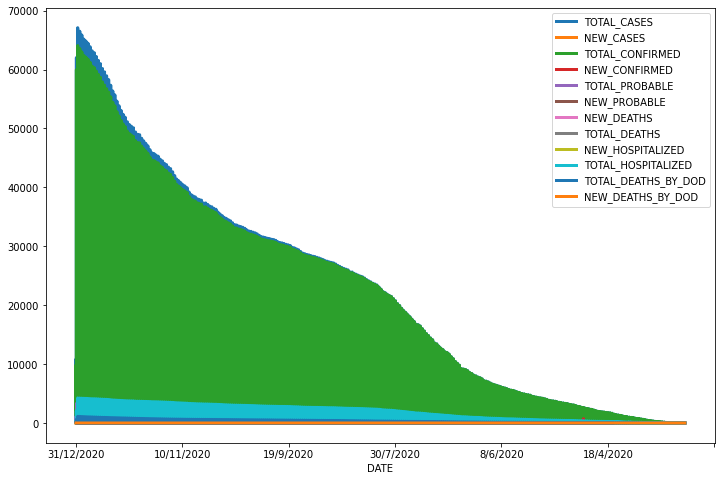

In [21]:
case =df1[['TOTAL_CASES','NEW_CASES','TOTAL_CONFIRMED',	'NEW_CONFIRMED','TOTAL_PROBABLE','NEW_PROBABLE',
     'NEW_DEATHS',	'TOTAL_DEATHS',	'NEW_HOSPITALIZED',	'TOTAL_HOSPITALIZED',	'TOTAL_DEATHS_BY_DOD','NEW_DEATHS_BY_DOD']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [22]:
# create new dataframe by selecting cell/row started from 2021
df2 = df[df['DATE'].str.contains("2021")]

In [23]:
df2.head()

COUNTY        DATE  TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  \
33368  Anderson  31/12/2021        14626         68             9683   
33369   Bedford  31/12/2021        10200         52             7509   
33370    Benton  31/12/2021         3176         13             2110   
33371   Bledsoe  31/12/2021         3673          9             2891   
33372    Blount  31/12/2021        26149        108            21213   

       NEW_CONFIRMED  TOTAL_PROBABLE  NEW_PROBABLE  POS_TESTS  NEW_POS_TESTS  \
33368             41            4943            27      10708             45   
33369             34            2691            18       8559             42   
33370              8            1066             5       2288              8   
33371              6             782             3       3084              6   
33372             73            4936            35      23093             80   

       NEG_TESTS  NEW_NEG_TESTS  TOTAL_TESTS  NEW_TESTS  NEW_DEATHS  \
33368      80468            116        91176        161           0   
33369      42168             60        50727        102           0   
33370      12593             20        14881         28           0   
33371      20166             40        23250         46           0   
33372     107311            192       130404        272           0   

       TOTAL_DEATHS  NEW_HOSPITALIZED  TOTAL_HOSPITALIZED  \
33368           265                 0                 343   
33369           204                 0                 295   
33370            80                 0                 117   
33371            39                 0                  83   
33372           322                 2                 776   

       TOTAL_DEATHS_BY_DOD  NEW_DEATHS_BY_DOD  
33368                  277                  1  
33369                  210                  0  
33370                   87                  0  
33371                   44                  0  
33372                  342                  1

In [24]:
df2 = df2.set_index('DATE')

In [25]:
df2[['TOTAL_CASES','NEW_CASES','TOTAL_CONFIRMED',	'NEW_CONFIRMED','TOTAL_PROBABLE','NEW_PROBABLE',
     'NEW_DEATHS',	'TOTAL_DEATHS',	'NEW_HOSPITALIZED',	'TOTAL_HOSPITALIZED',	'TOTAL_DEATHS_BY_DOD','NEW_DEATHS_BY_DOD']]

TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  NEW_CONFIRMED  \
DATE                                                                 
31/12/2021        14626         68             9683             41   
31/12/2021        10200         52             7509             34   
31/12/2021         3176         13             2110              8   
31/12/2021         3673          9             2891              6   
31/12/2021        26149        108            21213             73   
...                 ...        ...              ...            ...   
1/1/2021           2488         17             2148              9   
1/1/2021           3180         20             2513             12   
1/1/2021           2792         23             2370             19   
1/1/2021          18520        269            16859            229   
1/1/2021          12838        145            12007            125   

            TOTAL_PROBABLE  NEW_PROBABLE  NEW_DEATHS  TOTAL_DEATHS  \
DATE                                                                 
31/12/2021            4943            27           0           265   
31/12/2021            2691            18           0           204   
31/12/2021            1066             5           0            80   
31/12/2021             782             3           0            39   
31/12/2021            4936            35           0           322   
...                    ...           ...         ...           ...   
1/1/2021               340             8           0            17   
1/1/2021               667             8           0            43   
1/1/2021               422             4           0            39   
1/1/2021              1661            40           0           121   
1/1/2021               831            20           0           128   

            NEW_HOSPITALIZED  TOTAL_HOSPITALIZED  TOTAL_DEATHS_BY_DOD  \
DATE                                                                    
31/12/2021                 0                 343                  277   
31/12/2021                 0                 295                  210   
31/12/2021                 0                 117                   87   
31/12/2021                 0                  83                   44   
31/12/2021                 2                 776                  342   
...                      ...                 ...                  ...   
1/1/2021                   1                  68                   20   
1/1/2021                   1                  68                   50   
1/1/2021                   0                 132                   42   
1/1/2021                   1                 394                  144   
1/1/2021                   5                 386                  153   

            NEW_DEATHS_BY_DOD  
DATE                           
31/12/2021                  1  
31/12/2021                  0  
31/12/2021                  0  
31/12/2021                  0  
31/12/2021                  1  
...                       ...  
1/1/2021                    1  
1/1/2021                    0  
1/1/2021                    1  
1/1/2021                    2  
1/1/2021                    4  

[35405 rows x 12 columns]

In [26]:
df2.head()

COUNTY  TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  NEW_CONFIRMED  \
DATE                                                                           
31/12/2021  Anderson        14626         68             9683             41   
31/12/2021   Bedford        10200         52             7509             34   
31/12/2021    Benton         3176         13             2110              8   
31/12/2021   Bledsoe         3673          9             2891              6   
31/12/2021    Blount        26149        108            21213             73   

            TOTAL_PROBABLE  NEW_PROBABLE  POS_TESTS  NEW_POS_TESTS  NEG_TESTS  \
DATE                                                                            
31/12/2021            4943            27      10708             45      80468   
31/12/2021            2691            18       8559             42      42168   
31/12/2021            1066             5       2288              8      12593   
31/12/2021             782             3       3084              6      20166   
31/12/2021            4936            35      23093             80     107311   

            NEW_NEG_TESTS  TOTAL_TESTS  NEW_TESTS  NEW_DEATHS  TOTAL_DEATHS  \
DATE                                                                          
31/12/2021            116        91176        161           0           265   
31/12/2021             60        50727        102           0           204   
31/12/2021             20        14881         28           0            80   
31/12/2021             40        23250         46           0            39   
31/12/2021            192       130404        272           0           322   

            NEW_HOSPITALIZED  TOTAL_HOSPITALIZED  TOTAL_DEATHS_BY_DOD  \
DATE                                                                    
31/12/2021                 0                 343                  277   
31/12/2021                 0                 295                  210   
31/12/2021                 0                 117                   87   
31/12/2021                 0                  83                   44   
31/12/2021                 2                 776                  342   

            NEW_DEATHS_BY_DOD  
DATE                           
31/12/2021                  1  
31/12/2021                  0  
31/12/2021                  0  
31/12/2021                  0  
31/12/2021                  1

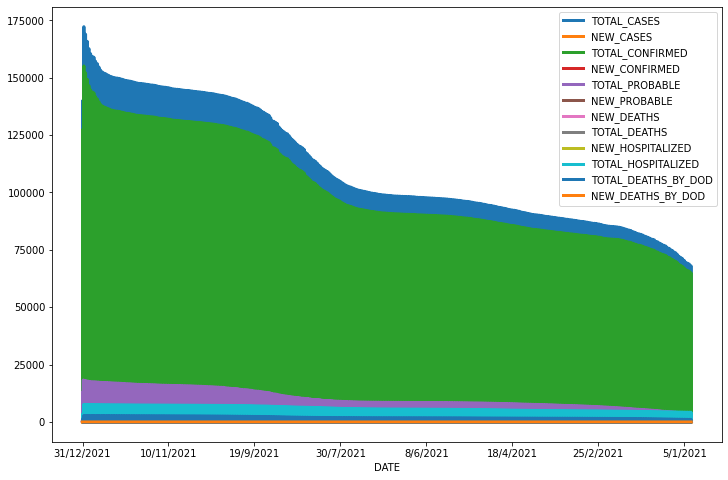

In [27]:
case1= df2[['TOTAL_CASES','NEW_CASES','TOTAL_CONFIRMED',	'NEW_CONFIRMED','TOTAL_PROBABLE','NEW_PROBABLE',
     'NEW_DEATHS',	'TOTAL_DEATHS',	'NEW_HOSPITALIZED',	'TOTAL_HOSPITALIZED',	'TOTAL_DEATHS_BY_DOD','NEW_DEATHS_BY_DOD']]
case1.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [28]:
# create new dataframe by selecting cell/row started from 2021
df3 = df[df['DATE'].str.contains("2022")]

In [29]:
df3.head()

COUNTY        DATE  TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  \
0  Anderson  10/12/2022        26624          2            16211   
1   Bedford  10/12/2022        17298          5            12508   
2    Benton  10/12/2022         5424          0             3154   
3   Bledsoe  10/12/2022         5220          0             3827   
4    Blount  10/12/2022        46919          5            37075   

   NEW_CONFIRMED  TOTAL_PROBABLE  NEW_PROBABLE  POS_TESTS  NEW_POS_TESTS  \
0              1           10413             1      17646              1   
1              5            4790             0      13873              5   
2              0            2270             0       3367              0   
3              0            1393             0       4061              0   
4              3            9844             2      39618              3   

   NEG_TESTS  NEW_NEG_TESTS  TOTAL_TESTS  NEW_TESTS  NEW_DEATHS  TOTAL_DEATHS  \
0      94584              7       112230          8           0           381   
1      53100             11        66973         16           0           246   
2      15084              6        18451          6           0           101   
3      24075              1        28136          1           0            63   
4     138816             25       178434         28           0           502   

   NEW_HOSPITALIZED  TOTAL_HOSPITALIZED  TOTAL_DEATHS_BY_DOD  \
0                 0                 385                  381   
1                 0                 335                  246   
2                 0                 129                  101   
3                 0                 100                   63   
4                 0                 963                  501   

   NEW_DEATHS_BY_DOD  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [30]:
df3 = df3.set_index('DATE')

In [31]:
df2[['TOTAL_CASES','NEW_CASES','TOTAL_CONFIRMED',	'NEW_CONFIRMED','TOTAL_PROBABLE','NEW_PROBABLE',
     'NEW_DEATHS',	'TOTAL_DEATHS',	'NEW_HOSPITALIZED',	'TOTAL_HOSPITALIZED',	'TOTAL_DEATHS_BY_DOD','NEW_DEATHS_BY_DOD']]

TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  NEW_CONFIRMED  \
DATE                                                                 
31/12/2021        14626         68             9683             41   
31/12/2021        10200         52             7509             34   
31/12/2021         3176         13             2110              8   
31/12/2021         3673          9             2891              6   
31/12/2021        26149        108            21213             73   
...                 ...        ...              ...            ...   
1/1/2021           2488         17             2148              9   
1/1/2021           3180         20             2513             12   
1/1/2021           2792         23             2370             19   
1/1/2021          18520        269            16859            229   
1/1/2021          12838        145            12007            125   

            TOTAL_PROBABLE  NEW_PROBABLE  NEW_DEATHS  TOTAL_DEATHS  \
DATE                                                                 
31/12/2021            4943            27           0           265   
31/12/2021            2691            18           0           204   
31/12/2021            1066             5           0            80   
31/12/2021             782             3           0            39   
31/12/2021            4936            35           0           322   
...                    ...           ...         ...           ...   
1/1/2021               340             8           0            17   
1/1/2021               667             8           0            43   
1/1/2021               422             4           0            39   
1/1/2021              1661            40           0           121   
1/1/2021               831            20           0           128   

            NEW_HOSPITALIZED  TOTAL_HOSPITALIZED  TOTAL_DEATHS_BY_DOD  \
DATE                                                                    
31/12/2021                 0                 343                  277   
31/12/2021                 0                 295                  210   
31/12/2021                 0                 117                   87   
31/12/2021                 0                  83                   44   
31/12/2021                 2                 776                  342   
...                      ...                 ...                  ...   
1/1/2021                   1                  68                   20   
1/1/2021                   1                  68                   50   
1/1/2021                   0                 132                   42   
1/1/2021                   1                 394                  144   
1/1/2021                   5                 386                  153   

            NEW_DEATHS_BY_DOD  
DATE                           
31/12/2021                  1  
31/12/2021                  0  
31/12/2021                  0  
31/12/2021                  0  
31/12/2021                  1  
...                       ...  
1/1/2021                    1  
1/1/2021                    0  
1/1/2021                    1  
1/1/2021                    2  
1/1/2021                    4  

[35405 rows x 12 columns]

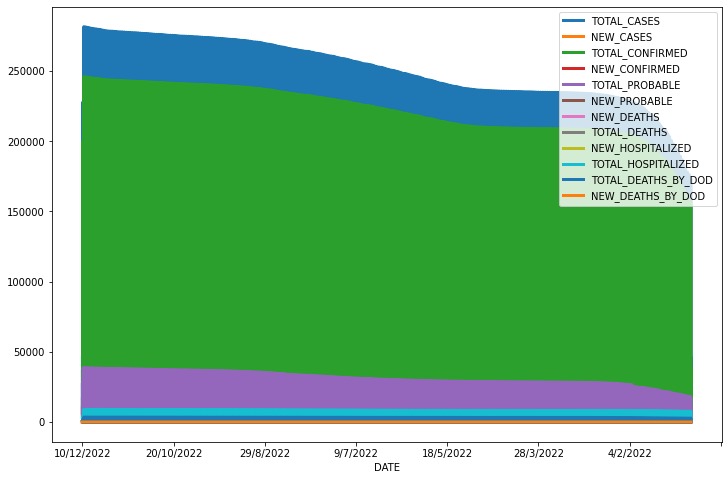

In [32]:
case3= df3[['TOTAL_CASES','NEW_CASES','TOTAL_CONFIRMED',	'NEW_CONFIRMED','TOTAL_PROBABLE','NEW_PROBABLE',
     'NEW_DEATHS',	'TOTAL_DEATHS',	'NEW_HOSPITALIZED',	'TOTAL_HOSPITALIZED',	'TOTAL_DEATHS_BY_DOD','NEW_DEATHS_BY_DOD']]
case3.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

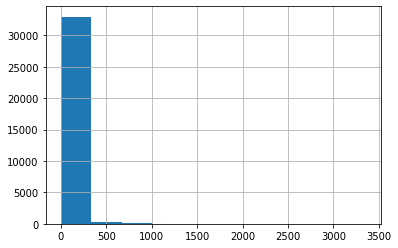

In [33]:
df3.NEW_CASES.hist()

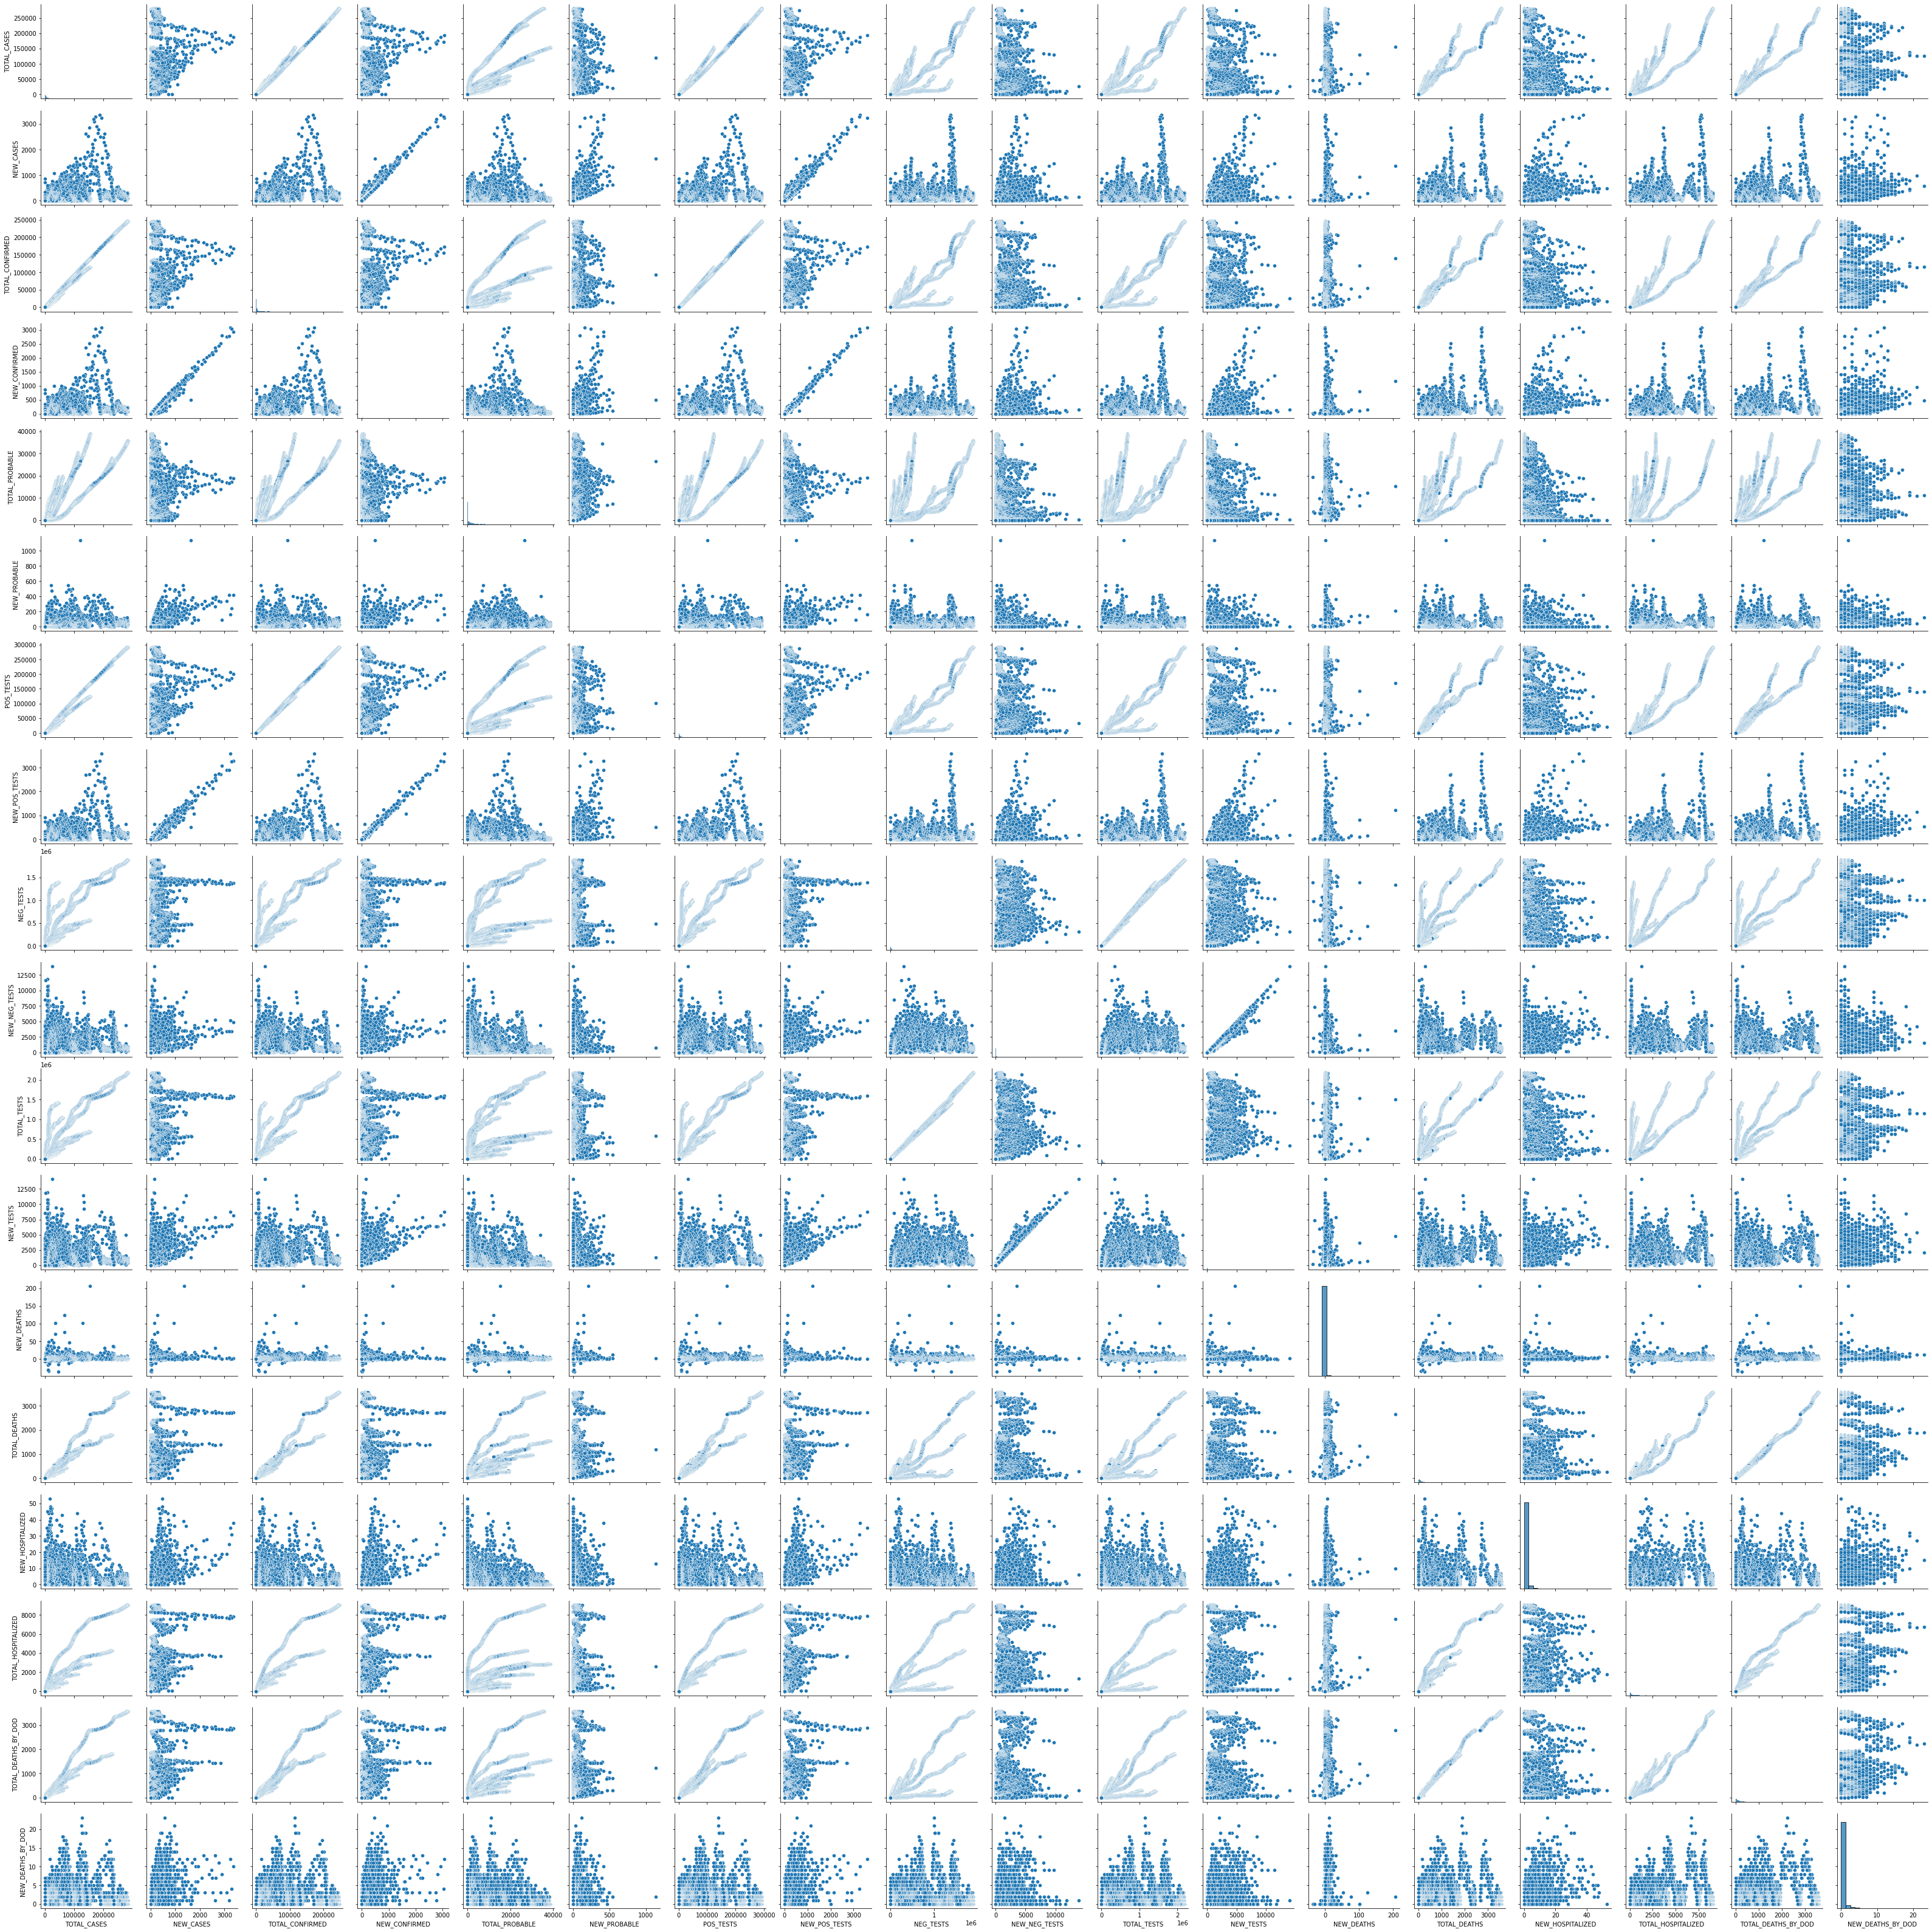

In [34]:
import seaborn as sns
sns.pairplot(df)

In [35]:
df.corr()

TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  NEW_CONFIRMED  \
TOTAL_CASES             1.000000   0.433776         0.995188       0.408263   
NEW_CASES               0.433776   1.000000         0.445698       0.984692   
TOTAL_CONFIRMED         0.995188   0.445698         1.000000       0.425499   
NEW_CONFIRMED           0.408263   0.984692         0.425499       1.000000   
TOTAL_PROBABLE          0.871358   0.307824         0.819087       0.259599   
NEW_PROBABLE            0.401481   0.764708         0.390278       0.640685   
POS_TESTS               0.991232   0.448201         0.999057       0.429887   
NEW_POS_TESTS           0.411096   0.977060         0.429815       0.995660   
NEG_TESTS               0.834215   0.417617         0.839896       0.400649   
NEW_NEG_TESTS           0.346664   0.526795         0.370868       0.548290   
TOTAL_TESTS             0.864409   0.427448         0.870414       0.410070   
NEW_TESTS               0.376893   0.627426         0.401659       0.649726   
NEW_DEATHS              0.197172   0.303460         0.205481       0.293817   
TOTAL_DEATHS            0.965241   0.429739         0.963843       0.407884   
NEW_HOSPITALIZED        0.271766   0.604575         0.294846       0.624567   
TOTAL_HOSPITALIZED      0.924204   0.478285         0.939730       0.468710   
TOTAL_DEATHS_BY_DOD     0.959935   0.441205         0.960089       0.419909   
NEW_DEATHS_BY_DOD       0.306491   0.541271         0.323444       0.540040   

                     TOTAL_PROBABLE  NEW_PROBABLE  POS_TESTS  NEW_POS_TESTS  \
TOTAL_CASES                0.871358      0.401481   0.991232       0.411096   
NEW_CASES                  0.307824      0.764708   0.448201       0.977060   
TOTAL_CONFIRMED            0.819087      0.390278   0.999057       0.429815   
NEW_CONFIRMED              0.259599      0.640685   0.429887       0.995660   
TOTAL_PROBABLE             1.000000      0.396257   0.800653       0.254575   
NEW_PROBABLE               0.396257      1.000000   0.385083       0.623109   
POS_TESTS                  0.800653      0.385083   1.000000       0.435128   
NEW_POS_TESTS              0.254575      0.623109   0.435128       1.000000   
NEG_TESTS                  0.678350      0.358448   0.843419       0.405585   
NEW_NEG_TESTS              0.172516      0.293566   0.381198       0.571625   
TOTAL_TESTS                0.702311      0.366929   0.873708       0.415115   
NEW_TESTS                  0.195320      0.361849   0.411812       0.671474   
NEW_DEATHS                 0.125452      0.250531   0.208290       0.296567   
TOTAL_DEATHS               0.824810      0.385101   0.963901       0.412658   
NEW_HOSPITALIZED           0.114693      0.354198   0.302511       0.640896   
TOTAL_HOSPITALIZED         0.705299      0.374077   0.945968       0.478958   
TOTAL_DEATHS_BY_DOD        0.812546      0.391156   0.960971       0.425500   
NEW_DEATHS_BY_DOD          0.174793      0.387836   0.328847       0.553631   

                     NEG_TESTS  NEW_NEG_TESTS  TOTAL_TESTS  NEW_TESTS  \
TOTAL_CASES           0.834215       0.346664     0.864409   0.376893   
NEW_CASES             0.417617       0.526795     0.427448   0.627426   
TOTAL_CONFIRMED       0.839896       0.370868     0.870414   0.401659   
NEW_CONFIRMED         0.400649       0.548290     0.410070   0.649726   
TOTAL_PROBABLE        0.678350       0.172516     0.702311   0.195320   
NEW_PROBABLE          0.358448       0.293566     0.366929   0.361849   
POS_TESTS             0.843419       0.381198     0.873708   0.411812   
NEW_POS_TESTS         0.405585       0.571625     0.415115   0.671474   
NEG_TESTS             1.000000       0.492162     0.998251   0.507441   
NEW_NEG_TESTS         0.492162       1.000000     0.487570   0.991856   
TOTAL_TESTS           0.998251       0.487570     1.000000   0.504773   
NEW_TESTS             0.507441       0.991856     0.504773   1.000000   
NEW_DEATHS            0.182112       0.231480     0.187812   0.25509

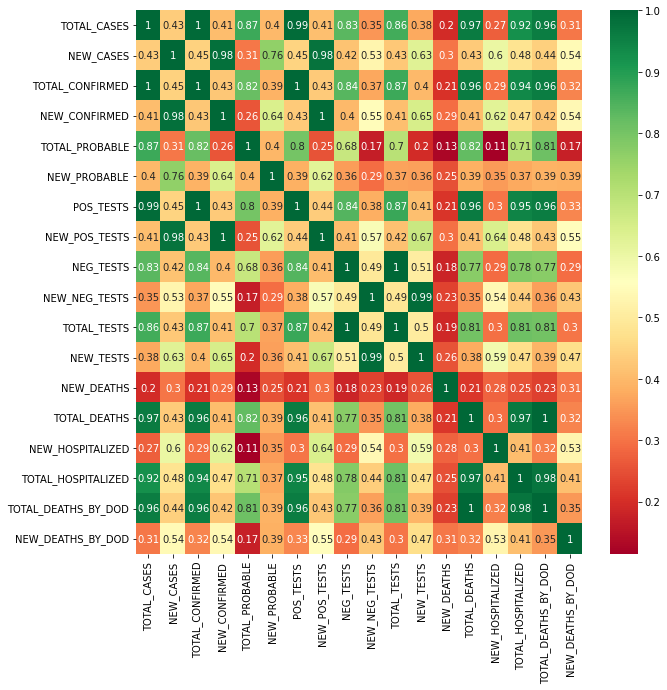

In [36]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Boruta Feature Selection


In [37]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(df.select_dtypes(include=numeric_lst).columns)

In [38]:
numerical_cols

['TOTAL_CASES',
 'NEW_CASES',
 'TOTAL_CONFIRMED',
 'NEW_CONFIRMED',
 'TOTAL_PROBABLE',
 'NEW_PROBABLE',
 'POS_TESTS',
 'NEW_POS_TESTS',
 'NEG_TESTS',
 'NEW_NEG_TESTS',
 'TOTAL_TESTS',
 'NEW_TESTS',
 'NEW_DEATHS',
 'TOTAL_DEATHS',
 'NEW_HOSPITALIZED',
 'TOTAL_HOSPITALIZED',
 'TOTAL_DEATHS_BY_DOD',
 'NEW_DEATHS_BY_DOD']

In [39]:
df=df[numerical_cols]
df.head()

TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  NEW_CONFIRMED  TOTAL_PROBABLE  \
0        26624          2            16211              1           10413   
1        17298          5            12508              5            4790   
2         5424          0             3154              0            2270   
3         5220          0             3827              0            1393   
4        46919          5            37075              3            9844   

   NEW_PROBABLE  POS_TESTS  NEW_POS_TESTS  NEG_TESTS  NEW_NEG_TESTS  \
0             1      17646              1      94584              7   
1             0      13873              5      53100             11   
2             0       3367              0      15084              6   
3             0       4061              0      24075              1   
4             2      39618              3     138816             25   

   TOTAL_TESTS  NEW_TESTS  NEW_DEATHS  TOTAL_DEATHS  NEW_HOSPITALIZED  \
0       112230          8           0           381                 0   
1        66973         16           0           246                 0   
2        18451          6           0           101                 0   
3        28136          1           0            63                 0   
4       178434         28           0           502                 0   

   TOTAL_HOSPITALIZED  TOTAL_DEATHS_BY_DOD  NEW_DEATHS_BY_DOD  
0                 385                  381                  0  
1                 335                  246                  0  
2                 129                  101                  0  
3                 100                   63                  0  
4                 963                  501                  0

In [40]:
X= df.drop(["NEW_CASES"], axis=1)

In [41]:
X.head()

TOTAL_CASES  TOTAL_CONFIRMED  NEW_CONFIRMED  TOTAL_PROBABLE  NEW_PROBABLE  \
0        26624            16211              1           10413             1   
1        17298            12508              5            4790             0   
2         5424             3154              0            2270             0   
3         5220             3827              0            1393             0   
4        46919            37075              3            9844             2   

   POS_TESTS  NEW_POS_TESTS  NEG_TESTS  NEW_NEG_TESTS  TOTAL_TESTS  NEW_TESTS  \
0      17646              1      94584              7       112230          8   
1      13873              5      53100             11        66973         16   
2       3367              0      15084              6        18451          6   
3       4061              0      24075              1        28136          1   
4      39618              3     138816             25       178434         28   

   NEW_DEATHS  TOTAL_DEATHS  NEW_HOSPITALIZED  TOTAL_HOSPITALIZED  \
0           0           381                 0                 385   
1           0           246                 0                 335   
2           0           101                 0                 129   
3           0            63                 0                 100   
4           0           502                 0                 963   

   TOTAL_DEATHS_BY_DOD  NEW_DEATHS_BY_DOD  
0                  381                  0  
1                  246                  0  
2                  101                  0  
3                   63                  0  
4                  501                  0

In [42]:
feature_names = np.array(X.columns) 

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [44]:
#Define the dependent variable that needs to be predicted (labels)
y = df["NEW_CASES"].values

In [45]:
##Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
# Define XGBOOST classifier to be used by Boruta
import xgboost as xgb
model = xgb.XGBClassifier()  #For Boruta

Create shadow features – random features and shuffle values in columns Train Random Forest / XGBoost and calculate feature importance via mean decrease impurity Check if real features have higher importance compared to shadow features Repeat this for every iteration If original feature performed better, then mark it as important

In [47]:
pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from boruta import BorutaPy

In [49]:
# define Boruta feature selection method
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

In [50]:
from sklearn.ensemble import RandomForestClassifier

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [51]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

In [52]:
# find all relevant features
feat_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	10
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=74, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F6722AB0D40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F6722AB0D40, verbose=2)

In [53]:
# check selected features
print(feat_selector.support_)  #Should we accept the feature

[False False  True False  True False  True False  True False  True  True
 False False False False False]


In [54]:
# check ranking of features
print(feat_selector.ranking_) #Rank 1 is the best

[ 7  6  1  8  1 12  1  4  1 10  1  1 11  3  4  9  2]


In [55]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)  #Apply feature selection and return transformed data

In [56]:
"""
Review the features
"""
# zip feature names, ranks, and decisions 
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

In [57]:
# print the results
for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: TOTAL_CASES                    Rank: 7,  Keep: False
Feature: TOTAL_CONFIRMED                Rank: 6,  Keep: False
Feature: NEW_CONFIRMED                  Rank: 1,  Keep: True
Feature: TOTAL_PROBABLE                 Rank: 8,  Keep: False
Feature: NEW_PROBABLE                   Rank: 1,  Keep: True
Feature: POS_TESTS                      Rank: 12,  Keep: False
Feature: NEW_POS_TESTS                  Rank: 1,  Keep: True
Feature: NEG_TESTS                      Rank: 4,  Keep: False
Feature: NEW_NEG_TESTS                  Rank: 1,  Keep: True
Feature: TOTAL_TESTS                    Rank: 10,  Keep: False
Feature: NEW_TESTS                      Rank: 1,  Keep: True
Feature: NEW_DEATHS                     Rank: 1,  Keep: True
Feature: TOTAL_DEATHS                   Rank: 11,  Keep: False
Feature: NEW_HOSPITALIZED               Rank: 3,  Keep: False
Feature: TOTAL_HOSPITALIZED             Rank: 4,  Keep: False
Feature: TOTAL_DEATHS_BY_DOD            Rank: 9,  Keep: False
Feature: NE

In [58]:
#Import svm model
from sklearn import svm

In [59]:
#xgb_model.fit(X_filtered, y_train)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [60]:
#Train the model using the training sets
clf.fit(X_filtered, y_train)

SVC(kernel='linear')

In [61]:
X_test_filtered = feat_selector.transform(X_test)

In [62]:
#Predict the response for test dataset
y_pred = clf.predict(X_test_filtered)

In [63]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [64]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5495543598800674
